

# **Leaf Wilting Detection in Soybean**


---
The notebook contains the classification of evel of wilting of Soybean leaves based on the training data provided to us.

The block below is used to import the libraries to make use of GDrive for the classsification and training the model.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Importing the library fastai.vision to use the libraries and models like ImageDataBunch and resnet18.

In [ ]:
from fastai.vision import *

Making use of python pandas to read the csv and storing the dataset as a DataFrame to use it for making an ImageDataBunch.

In [ ]:

# df=pd.read_csv("/content/gdrive/My Drive/DATA AUG/trainann.csv",header='infer')
df=pd.read_csv("/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2/TrainAnnotations.csv",header='infer')

dict=df.set_index('file_name').to_dict()

In [ ]:
df

,file_name,annotation
0,000006.jpg,0
1,000016.jpg,0
2,000032.jpg,0
3,000097.jpg,4
4,000104.jpg,0
...,...,...
1270,027681.jpg,4
1271,024392.jpg,4
1272,023487.jpg,4
1273,027759.jpg,4


In [ ]:
dict['annotation']

{'000006.jpg': 0,
 '000016.jpg': 0,
 '000032.jpg': 0,
 '000097.jpg': 4,
 '000104.jpg': 0,
 '000122.jpg': 3,
 '000237.jpg': 4,
 '000253.jpg': 0,
 '000265.jpg': 0,
 '000300.jpg': 2,
 '000306.jpg': 2,
 '000333.jpg': 0,
 '000339.jpg': 2,
 '000353.jpg': 0,
 '000387.jpg': 0,
 '000401.jpg': 1,
 '000424.jpg': 3,
 '000470.jpg': 1,
 '000478.jpg': 4,
 '000479.jpg': 3,
 '000488.jpg': 0,
 '000555.jpg': 4,
 '000561.jpg': 1,
 '000608.jpg': 3,
 '000635.jpg': 1,
 '000675.jpg': 0,
 '000698.jpg': 2,
 '000704.jpg': 1,
 '000710.jpg': 3,
 '000738.jpg': 3,
 '000747.jpg': 0,
 '000758.jpg': 2,
 '000770.jpg': 4,
 '000778.jpg': 2,
 '000780.jpg': 2,
 '000810.jpg': 3,
 '000821.jpg': 0,
 '000876.jpg': 0,
 '000917.jpg': 0,
 '000934.jpg': 4,
 '000941.jpg': 0,
 '000957.jpg': 0,
 '000979.jpg': 0,
 '000981.jpg': 0,
 '001010.jpg': 0,
 '001027.jpg': 3,
 '001038.jpg': 0,
 '001064.jpg': 1,
 '001106.jpg': 0,
 '001118.jpg': 3,
 '001133.jpg': 1,
 '001140.jpg': 3,
 '001150.jpg': 0,
 '001163.jpg': 2,
 '001182.jpg': 0,
 '001197.j

In [ ]:
df1

[]

Here, in the next block we are augmenting our data with images(making replications of each image in the data making deformations in the original data) with respect to the size of the data of a particular class. 
 

```

```


**NOTE: This is an experiment we performed on the project which did not turn in to increase the accuracy. So, we did not consider this for the final report.**

In [ ]:
df1=[]
path = Path('/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2')
path_hr = path
il = ImageList.from_folder(path_hr)
tfms = get_transforms(max_rotate=25)
def data_aug_one(ex_img,prox,qnt):
    imagenamewithouturl=str(ex_img).split('/')[-1]
    for lop in range(0,qnt):
      image_name =str(imagenamewithouturl)[:-4]+'aug_'+ str(prox) +'.jpg'
      dest = path_hr/image_name
      prox = prox + 1
      new_img = open_image(ex_img)
      new_img_fin = new_img.apply_tfms(tfms[0], new_img, xtra={tfms[1][0].tfm: {"size": 224}}, size=224)
      new_img_fin.save(dest)
      df1.append([image_name] + [dict['annotation'][imagenamewithouturl]])
prox = 1
l=il.items
for imagen in l:
  switch={0:1,1:2,2:6,3:7,4:4}
  qnt=switch[dict['annotation'][str(imagen).split('/')[-1]]]
  data_aug_one(imagen,prox,qnt)
  prox = 1
  # print([dict['annotation'][str(imagen).split('/')[-1]]])


In [ ]:
len(df1)

3631

In [ ]:
df2=pd.DataFrame(df1,columns=['file_name','annotation'])
df2

,file_name,annotation
0,024405aug_1.jpg,4
1,024405aug_2.jpg,4
2,024405aug_3.jpg,4
3,024405aug_4.jpg,4
4,023471aug_1.jpg,4
...,...,...
3626,018884aug_2.jpg,4
3627,018884aug_3.jpg,4
3628,018884aug_4.jpg,4
3629,009992aug_1.jpg,0


Appending the new set of images created in the dataframe to be converted to ImageDataBunch for training.

In [ ]:
res=df.append(df2)
res

,file_name,annotation
0,000006.jpg,0
1,000016.jpg,0
2,000032.jpg,0
3,000097.jpg,4
4,000104.jpg,0
...,...,...
3626,018884aug_2.jpg,4
3627,018884aug_3.jpg,4
3628,018884aug_4.jpg,4
3629,009992aug_1.jpg,0


This was the previous implementation of the CNN where original data was used for training.

In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2/TrainAnnotations.csv",header='infer')
df.head()


,file_name,annotation
0,000006.jpg,0
1,000016.jpg,0
2,000032.jpg,0
3,000097.jpg,4
4,000104.jpg,0


Making transformations to the data in order to process the images for better learning.

In [ ]:
testpath=Path("/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TestData")
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,)
data=ImageDataBunch.from_df("/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2",df,size=224,test=testpath,ds_tfms=tfms,bs=16).normalize(imagenet_stats)
# data=ImageDataBunch.from_df("/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2",res,size=224,test=testpath,ds_tfms=tfms,bs=16).normalize(imagenet_stats)

In [ ]:
len(tfms)

2

Showing 2 rows of the first batch of data.

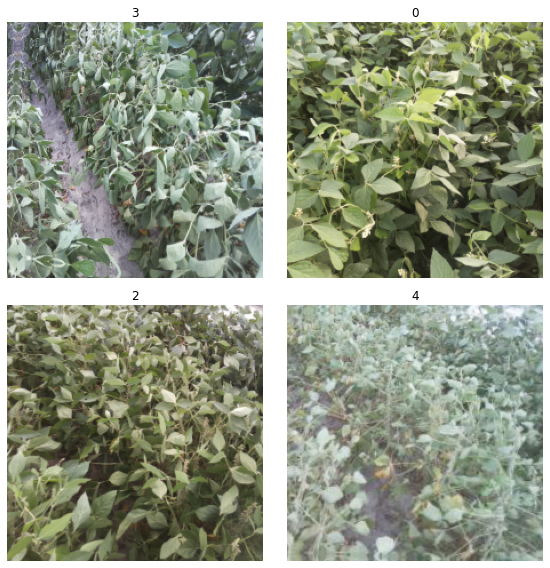

In [ ]:
data.show_batch(rows=2)

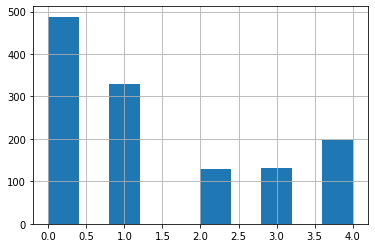

In [ ]:
df['annotation'].hist()


In [ ]:
# labels = []
# for img,target in data.train_dl.dl:
#     labels.append(target)
# labels = torch.cat(labels)
# # plt.hist(labels)
# labels

In [ ]:
np.bincount([data.train_dl.dataset.y[i].data for i in range(len(data.train_dl.dataset))])

array([799, 804, 728, 798, 796])

In [ ]:
np.bincount([data.valid_dl.dataset.y[i].data for i in range(len(data.valid_dl.dataset))])

array([177, 183, 182, 250, 189])

In [ ]:
np.max(np.bincount([data.train_dl.dataset.y[i].data for i in range(len(data.train_dl.dataset))]))


804

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds),len(data.test_ds)

([0, 1, 2, 3, 4], 5, 3925, 981, 200)

Creating a learnerwith resnet18 and the train data provided.

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, callback_fns=ShowGraph).to_fp16()
# learn.TTA(ds_type=DatasetType.Valid)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-03
Min loss divided by 10: 3.31E-03


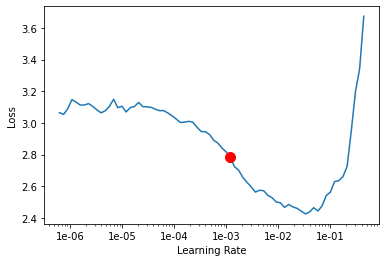

In [ ]:
learn.lr_find()
# Explanation for Finding the best learning https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,1.311243,0.834147,0.720693,01:06
1,1.144288,0.788899,0.700306,01:08
2,0.896548,0.601077,0.753313,01:08
3,0.811753,0.596666,0.770642,01:07
4,0.722386,0.508363,0.807339,01:07
5,0.714044,0.466059,0.818552,01:06
6,0.581269,0.402116,0.840979,01:07
7,0.535452,0.384765,0.854230,01:07
8,0.492067,0.360609,0.869521,01:06
9,0.538463,0.364349,0.856269,01:05


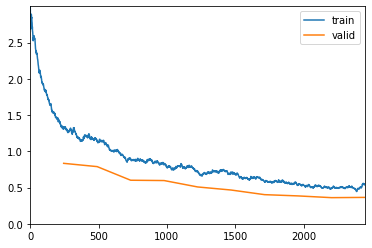

In [ ]:
learn.fit_one_cycle(10)

It is the ideal way of training model. When you initialize the Conv learner, the last layers have randomly assigned weights and the initial layers have weights pretrained on Imagenet. By default layers that are already trained are freezed ( won’t be trained until you unfreeze them ). So when you fit first you are training only the last layers. Then you unfreeze all the layers, now when you fit all layers get trained. And what max_lr does is, instead of apply the same learning rate to all the layers, it applies different LR across the layers. So for initial layers it is low and high for the last layers.
link: https://forums.fast.ai/t/lesson1-trying-to-understand-fit-one-cylcle-unfreeze-and-max-lr/27963

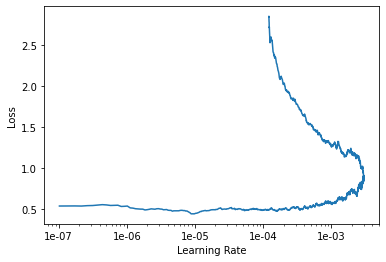

In [ ]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.472536,0.351677,0.862385,01:06
1,0.480729,0.327575,0.881753,01:07
2,0.455201,0.306244,0.886850,01:06
3,0.401389,0.289677,0.889908,01:06
4,0.368648,0.290090,0.893986,01:06


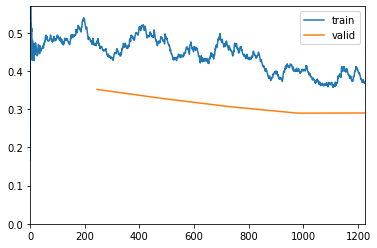

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-4))
learn.save('stage1')

epoch,train_loss,valid_loss,accuracy,time
0,0.377259,0.274801,0.899083,01:05


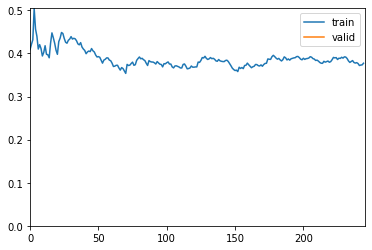

In [ ]:
learn.fit_one_cycle(1,max_lr=slice(1e-6,1e-4))


In [ ]:
learn.save('stage1')


In [ ]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (3925 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: /content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2;

Valid: LabelList (981 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
4,2,3,0,4
Path: /content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2;

Test: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05,

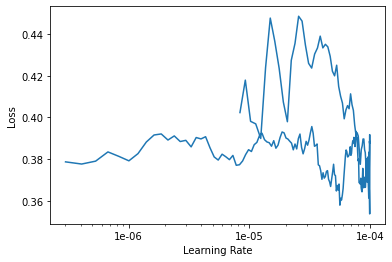

In [ ]:
learn.recorder.plot()

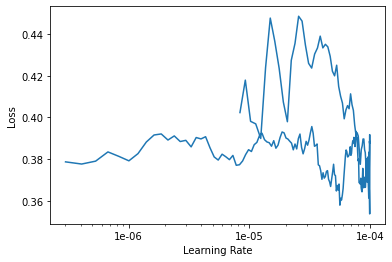

In [ ]:
# learn.load('stage1')
# learn.lr_find()
learn.recorder.plot()

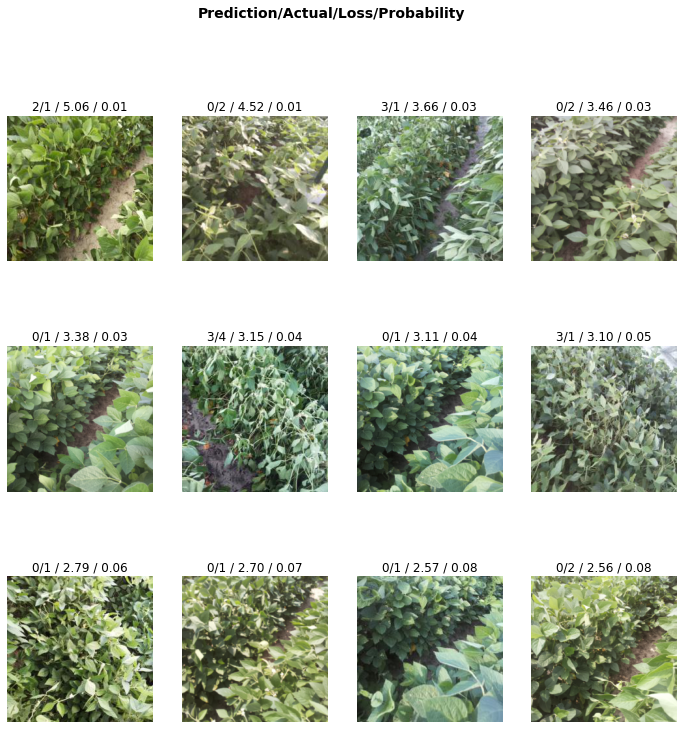

In [ ]:
# learn.load('stage1')
interp = ClassificationInterpretation.from_learner(learn)
toplosses,idxs=interp.top_losses()
interp.plot_top_losses(12)

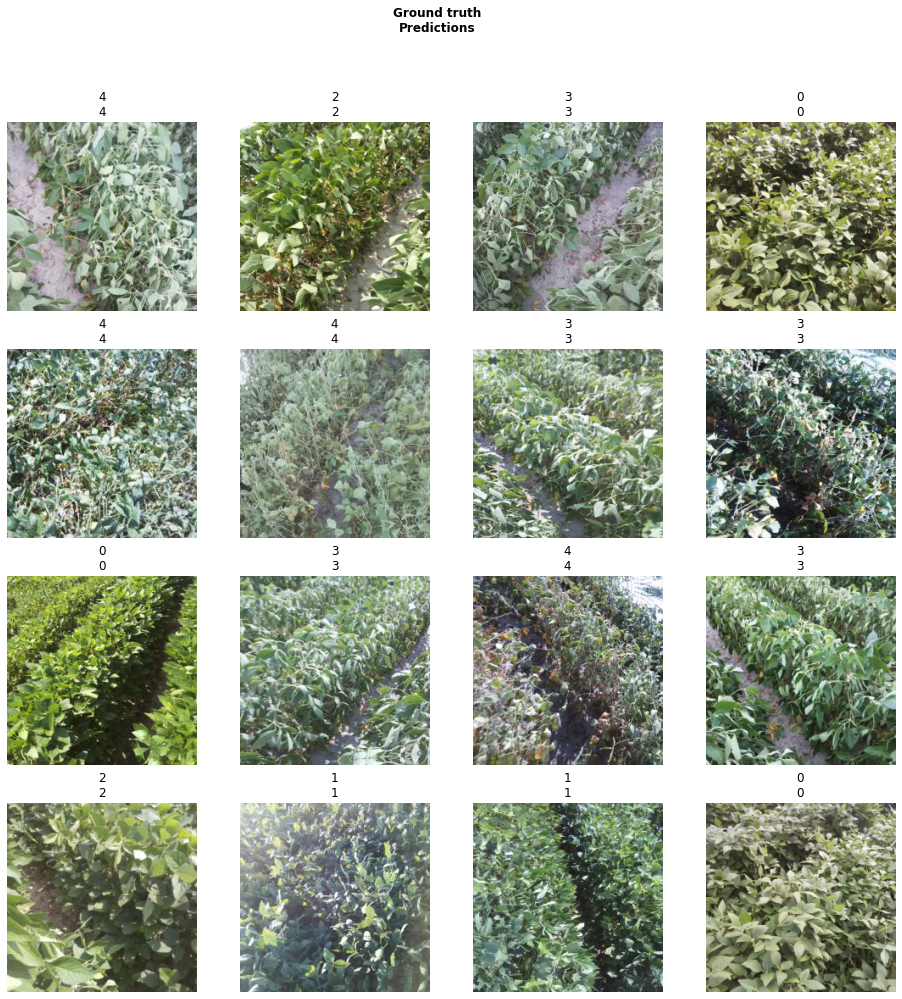

In [ ]:
learn.show_results()

Plotting the Confusion based in the randomly selected validation data from the whole train data.

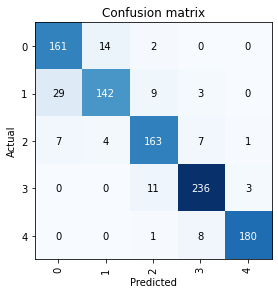

In [ ]:
interp.plot_confusion_matrix()

Creating a new learner 'learn' with the test data and then loading the weights saved in our model.

In [ ]:
classes = [0,1,2,3,4]
path="/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2"
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=tfms).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet18)
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_si

Making predictions.

In [ ]:
preds = []
pred_dir="/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TestData"
# "/content/gdrive/My Drive/ECE542_sp20_CompetitionData-20200229T032116Z-001/ECE542_sp20_CompetitionData/TestData"
for f in Path(pred_dir).iterdir():
    filename= str(f).split('/')[-1]
    a=[filename,0,0,0,0,0]
    _,x,_ = learn.predict(open_image(f).apply_tfms(tfms[0]))
    a[int(x)+1]=1
    preds.append(a)
pp=sorted(preds,key=lambda x: x[0])
for sublist in pp:
    del sublist[0]
import csv
with open("/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2/predictions.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(pp)

In [ ]:
fd=pd.read_csv("/content/gdrive/My Drive/ECE542_sp20_CompetitionData 2/ECE542_sp20_CompetitionData/TrainData-C2/predictions.csv",header='infer')
fd.head()

,0,1,0.1,0.2,0.3
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
